In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df= pd.read_csv("/content/drive/MyDrive/diabetes data set/editedieeedataset.csv")
df.head(100)

,hypoglycemia,heartRate,glucose,Diabetic
0,NaN,98,79,N
1,NaN,102,80,N
2,NaN,81,70,N
3,NaN,96,70,N
4,NaN,92,100,N
...,...,...,...,...
95,NaN,104,85,N
96,NaN,103,83,N
97,NaN,93,85,N
98,NaN,80,74,N


In [5]:
df["heartRate"].isnull().sum()



0

In [6]:
df["glucose"].isnull().sum()

0

In [7]:
df.Diabetic[df.Diabetic == 'N'] = 0
df.Diabetic[df.Diabetic == 'D'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df.head()

,hypoglycemia,heartRate,glucose,Diabetic
0,NaN,98,79,0
1,NaN,102,80,0
2,NaN,81,70,0
3,NaN,96,70,0
4,NaN,92,100,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hypoglycemia  0 non-null      float64
 1   heartRate     16969 non-null  object 
 2   glucose       16969 non-null  int64  
 3   Diabetic      16968 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 530.4+ KB


In [10]:
df['heartRate'] = pd.to_numeric(df['heartRate'],errors = 'coerce')

In [11]:
df['Diabetic'] = pd.to_numeric(df['Diabetic'],errors = 'coerce')

In [12]:
df['glucose'] = df['glucose'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hypoglycemia  0 non-null      float64
 1   heartRate     16967 non-null  float64
 2   glucose       16969 non-null  float64
 3   Diabetic      16968 non-null  float64
dtypes: float64(4)
memory usage: 530.4 KB


In [14]:
df.isnull().values.any()

True

In [15]:
df["heartRate"].isnull().sum()

2

In [16]:
df["heartRate"].mean()

91.5243708375081

In [17]:
df['heartRate'] = df['heartRate'].replace(np.nan, 92)

In [18]:
df["heartRate"].isnull().sum()

0

In [19]:
df["Diabetic"].isnull().sum()
df["Diabetic"] = df["Diabetic"].replace(np.nan,0)

In [20]:
df["glucose"].isnull().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hypoglycemia  0 non-null      float64
 1   heartRate     16969 non-null  float64
 2   glucose       16969 non-null  float64
 3   Diabetic      16969 non-null  float64
dtypes: float64(4)
memory usage: 530.4 KB


In [22]:
for i in range(len(df)):
  if (df['glucose'].values[i] < 70.0):
     df['hypoglycemia'].values[i]=1
  else:
     df['hypoglycemia'].values[i]=0
df.tail(20) 

,hypoglycemia,heartRate,glucose,Diabetic
16949,0.0,91.0,71.0,1.0
16950,0.0,94.0,86.0,1.0
16951,0.0,84.0,78.0,1.0
16952,0.0,93.0,76.0,1.0
16953,0.0,85.0,82.0,1.0
16954,0.0,84.0,77.0,1.0
16955,0.0,91.0,72.0,1.0
16956,0.0,78.0,83.0,1.0
16957,0.0,83.0,77.0,1.0
16958,0.0,92.0,84.0,1.0


In [23]:
df.corr()

,hypoglycemia,heartRate,glucose,Diabetic
hypoglycemia,1.000000,0.705828,-0.474847,0.091850
heartRate,0.705828,1.000000,-0.343220,0.004580
glucose,-0.474847,-0.343220,1.000000,0.045169
Diabetic,0.091850,0.004580,0.045169,1.000000


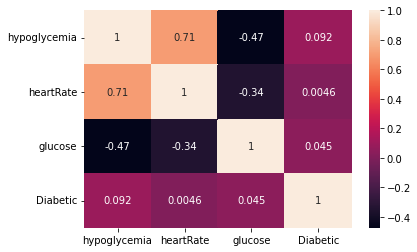

In [24]:
import seaborn as sns

correlationmatrix= df.corr()
top_correlated_features= correlationmatrix.index


sns.heatmap(df[top_correlated_features].corr(), annot= True)


In [25]:
hypoglycemia_yes_count= len(df.loc[df['hypoglycemia']==1])
hypoglycemia_no_count= len(df.loc[df['hypoglycemia']==0])
print(hypoglycemia_yes_count, hypoglycemia_no_count)

5147 11822


In [62]:
#from sklearn.model_selection import train_test_split
#X= df.iloc[:, 1:4]
#y=df.iloc[:,0]
#print(X.head(30))
#print(y.head(30))

    heartRate  glucose  Diabetic
0        98.0     79.0       0.0
1       102.0     80.0       0.0
2        81.0     70.0       0.0
3        96.0     70.0       0.0
4        92.0    100.0       0.0
5        89.0    100.0       0.0
6        78.0    100.0       0.0
7        83.0    100.0       0.0
8        87.0    100.0       0.0
9        96.0     80.0       0.0
10       96.0     75.0       0.0
11       84.0     82.0       0.0
12       79.0     77.0       0.0
13      101.0     71.0       0.0
14      101.0     76.0       0.0
15       85.0     77.0       0.0
16       85.0     70.0       0.0
17       82.0     73.0       0.0
18       91.0     76.0       0.0
19       82.0     75.0       0.0
20      101.0     77.0       0.0
21      100.0     83.0       0.0
22      105.0     76.0       0.0
23       92.0     73.0       0.0
24       92.0     73.0       0.0
25       80.0     80.0       0.0
26       95.0     79.0       0.0
27       84.0     84.0       0.0
28       88.0     78.0       0.0
29       9

In [85]:

Data = df.drop(['hypoglycemia'],axis =1)
outcome = df.hypoglycemia.values

In [86]:
x_train,x_test,y_train,y_test = train_test_split(Data,outcome, test_size=0.4, random_state=1)


In [74]:
#print(x_train.head(30))
#print(x_test.head(30))
#print(y_test.head(30))


       heartRate  glucose  Diabetic
6267        81.0     80.0       1.0
12940       87.0    124.0       1.0
130        101.0     80.0       0.0
9971        92.0    104.0       1.0
1977        97.0     64.0       1.0
4406       111.0     68.0       1.0
1227       106.0     61.0       1.0
1967       114.0     64.0       1.0
3953        91.0     68.0       1.0
3860        92.0     68.0       1.0
15825       84.0     70.0       1.0
5181       117.0     68.0       1.0
15332       78.0     72.0       1.0
6609        85.0     82.0       1.0
2558       115.0     66.0       1.0
10184       80.0    106.0       1.0
666        119.0     60.0       1.0
2090       115.0     64.0       1.0
15495       95.0     80.0       1.0
16337       79.0     86.0       1.0
3611        85.0     68.0       1.0
9244        81.0     99.0       1.0
5367       106.0     69.0       1.0
949         85.0     61.0       1.0
4116       105.0     68.0       1.0
14960       82.0     70.0       1.0
4383       103.0     68.0   

AttributeError: ignored

In [87]:
from sklearn.impute import SimpleImputer
imputer_obj= SimpleImputer(missing_values=0, strategy= "mean")
X = imputer_obj.fit_transform(X)

In [52]:
#X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.8, random_state=1)

In [89]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(random_state=1)
random_forest_model.fit(x_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [91]:
predictions= random_forest_model.predict(x_test)
from sklearn import metrics
print("Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, predictions)))

Accuracy=  1.000


In [55]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=5)

In [56]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(random_state=30)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [57]:
predictions= random_forest_model.predict(X_test)
from sklearn import metrics
print("Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, predictions)))

Accuracy=  1.000


In [37]:
params= {
    "learning_rate"     : [0.05, 0.1, 0.10, 0.15, 0.2, 0.25, 0.3],
    "max_depth"         : [3,4,6,7,8,10, 12,15],
    "min_child_weight"  : [1,3,5,7],
    "gamma"             : [0.0,0.1, 0.2, 0.3, 0.4, 0.5],
    "colsample_bytree"  : [0.3,0.4, 0.5, 0.6, 0.7]
}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import xgboost

In [39]:
classifier= xgboost.XGBClassifier()

In [40]:
random_search= RandomizedSearchCV(classifier, 
                                  param_distributions=params, 
                                  n_iter=10, 
                                  scoring='roc_auc', 
                                  n_jobs=-1, 
                                  cv=5,
                                  verbose=3)

In [41]:
#Lets define a time function to check on time-lapse
def timer(start_time= None):
  if not start_time:
    start_time= datetime.now()
    return start_time

  elif start_time: 
    thour, temp_sec= divmod((datetime.now()- start_time).total_seconds(),3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes and %s seconds' %(thour, tmin, round(tsec, 2)))

In [42]:
from datetime import datetime

start_time= timer(None)
random_search.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.8s finished



 Time taken: 0 hours 0 minutes and 12.15 seconds


In [43]:
def timer(start_time= None):
  if not start_time:
    start_time= datetime.now()
    return start_time

  elif start_time: 
    thour, temp_sec= divmod((datetime.now()- start_time).total_seconds(),3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes and %s seconds' %(thour, tmin, round(tsec, 2)))


In [44]:
from datetime import datetime

start_time= timer(None)
random_search.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.1s finished



 Time taken: 0 hours 0 minutes and 11.38 seconds


In [45]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
final_classifier= xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
final_classifier.fit(X_train, y_train)

y_pred= final_classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
score= accuracy_score(y_test, y_pred)

print(cm)
print(score)

[[2356    0]
 [   0 1038]]
1.0
